In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d rmisra/news-headlines-dataset-for-sarcasm-detection

  0% 0.00/3.30M [00:00<?, ?B/s]
100% 3.30M/3.30M [00:00<00:00, 122MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/news-headlines-dataset-for-sarcasm-detection.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
SD_DATA = pd.read_json("/content/Sarcasm_Headlines_Dataset_v2.json",lines=True)

In [ ]:
SD_DATA.head(20)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
5,0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...
6,0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...
7,1,richard branson's global-warming donation near...,https://www.theonion.com/richard-bransons-glob...
8,1,shadow government getting too large to meet in...,https://politics.theonion.com/shadow-governmen...
9,0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...


In [ ]:
SD_DATA.tail(20)

,is_sarcastic,headline,article_link
28599,0,tight wisconsin house primary too close to cal...,https://www.huffingtonpost.com/entry/wisconsin...
28600,0,diagnosing and curing our sick health system,https://www.huffingtonpost.com/entry/diagnosin...
28601,0,cooking off the cuff: bluefish in saor – a new...,https://www.huffingtonpost.com/entry/cooking-o...
28602,0,omarosa turns on trump: wouldn't vote for him ...,https://www.huffingtonpost.com/entry/omarosa-t...
28603,1,area eyesore also a data technician,https://www.theonion.com/area-eyesore-also-a-d...
28604,0,new york attorney general conducting 'inquiry'...,https://www.huffingtonpost.com/entry/investiga...
28605,0,get ready to capture pokémon in the real world...,https://www.huffingtonpost.com/entry/pokemon-g...
28606,0,amy schumer pens letter to tampa trump fans wh...,https://www.huffingtonpost.com/entry/amy-schum...
28607,0,what our grieving family needs from loved ones...,https://www.huffingtonpost.com/entry/what-our-...
28608,0,stephen colbert attempts to list everything tr...,https://www.huffingtonpost.com/entry/stephen-c...


In [ ]:
SD_DATA.shape

(28619, 3)

In [ ]:
SD_DATA.columns

Index(['is_sarcastic', 'headline', 'article_link'], dtype='object')

In [ ]:
# check the data types in the columns
SD_DATA.dtypes

is_sarcastic     int64
headline        object
article_link    object
dtype: object

In [ ]:
# check the null values in data
SD_DATA.isna().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [ ]:
#checking the unique values in 'is_sarcastic' column
SD_DATA.is_sarcastic.unique()


array([1, 0])

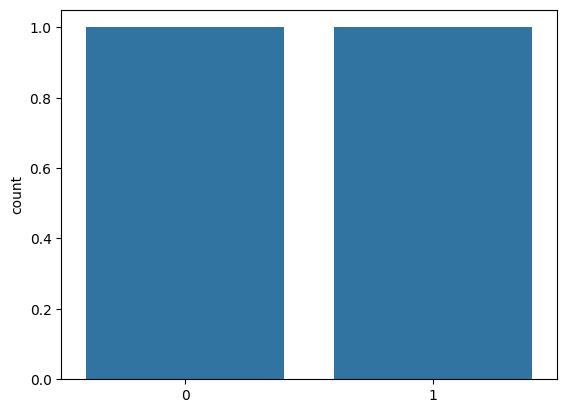

In [ ]:
#checking the value counts in 'is_sarcastic' column
SD_DATA.is_sarcastic.value_counts()
sns.countplot(SD_DATA['is_sarcastic'].value_counts())
plt.show()

In [ ]:

#drop 'article_link' column
SD_DATA = SD_DATA.drop('article_link', axis=1)

In [ ]:

#check the data
SD_DATA.head(10)

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...
5,0,my white inheritance
6,0,5 ways to file your taxes with less stress
7,1,richard branson's global-warming donation near...
8,1,shadow government getting too large to meet in...
9,0,lots of parents know this scenario


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Convert to Lowercase using lower()
SD_DATA['headline'] = SD_DATA['headline'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
SD_DATA

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...
...,...,...
28614,1,jews to celebrate rosh hashasha or something
28615,1,internal affairs investigator disappointed con...
28616,0,the most beautiful acceptance speech this week...
28617,1,mars probe destroyed by orbiting spielberg-gat...


In [ ]:
#types of stopwords
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
#stopwords detection
set_stopwords = set(stopwords.words("english"))
def clean_txt(text): # define the fuction with tokenization/string cleaning for all datasets

    text = re.sub(r"[^A-Za-z,!?]", " ", text)
    text = re.sub(r'\[[^]]*\]'," ", text)
    text = re.sub(r"\'s", "", text)
    text = re.sub(r"\'t", "", text )
    text = re.sub(r"\'re", "",text)
    text = re.sub(r"\'d", "", text)
    text = re.sub(r"\'ll", " ",text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\(", " ", text)
    text = re.sub(r"\)", " ", text)
    text = re.sub(r"\'", " ", text)
    text = re.sub(r"aa", "", text)
    text = re.sub(r"zz", "", text)
    text = re.sub(r"[0-9]", ' ', text)
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in set_stopwords)
    return text

SD_DATA['headline'] = SD_DATA['headline'].apply(clean_txt)

In [ ]:
SD_DATA.head(10)

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep totally nails congress falling short g...
2,0,eat veggies deliciously different recipes
3,1,inclement weather prevents liar getting work
4,1,mother comes pretty close using word streaming...
5,0,white inheritance
6,0,ways file taxes less stress
7,1,richard branson global warming donation nearly...
8,1,shadow government getting large meet marriott ...
9,0,lots parents know scenario


In [ ]:
data_clean_len = sum(len(headline.split(' ')) for headline in SD_DATA['headline'])
data_clean_len

#Example:
#For instance, if headline is "Natural Language Processing is awesome", headline.split(' ') would
#return ["Natural", "Language", "Processing", "is", "awesome"].


205988

In [ ]:
#checking emojies in the data
import pandas as pd
import re

# Example DataFrame (replace this with your actual DataFrame)
# SD_DATA = pd.read_csv("your_data.csv")

def has_emoji(text):
    # Regular expression pattern to match emojis and emoticons
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # Emoticons
                               u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                               u"\U0001F680-\U0001F6FF"  # Transport & Map symbols
                               u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
                               u"\U00002500-\U00002BEF"  # Chinese/Japanese/Korean characters
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # Dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)

    # Check if emoji pattern matches any part of the text
    return bool(emoji_pattern.search(text))

# Apply the function to the 'headline' column of SD_DATA
emoji_present = SD_DATA['headline'].apply(has_emoji)

# Check if any emojis or emoticons are present in the data
if emoji_present.any():
    print("Emojis or emoticons are present in the data.")
else:
    print("No emojis or emoticons found in the data.")


No emojis or emoticons found in the data.


In [ ]:
from collections import Counter
cnt = Counter()
for text in SD_DATA["headline"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)

[('trump', 1827),
 ('new', 1684),
 ('man', 1525),
 ('report', 605),
 ('year', 586),
 ('one', 584),
 ('woman', 547),
 ('day', 519),
 ('u', 510),
 ('area', 501)]

In [ ]:
#checking most common words
from collections import Counter

# Assuming you have a 'headline' column in your DataFrame
headlines = SD_DATA['headline']

# Initialize a Counter to count the frequency of words
word_counts = Counter()

# Iterate through each headline to count words
for headline in headlines:
    word_counts.update(headline.split())

# Determine the most common words to remove
most_common_words = set(word for word, count in word_counts.most_common(10))  # Adjust 10 to the number of most frequent words you want to remove

# Function to remove the most frequent words from a headline
def remove_most_common_words(headline):
    return ' '.join(word for word in headline.split() if word not in most_common_words)

# Apply the function to each headline in the DataFrame
SD_DATA['headline'] = SD_DATA['headline'].apply(remove_most_common_words)

# Display the modified DataFrame
print(SD_DATA.head(10))


   is_sarcastic                                           headline
0             1  thirtysomething scientists unveil doomsday clo...
1             0  dem rep totally nails congress falling short g...
2             0          eat veggies deliciously different recipes
3             1       inclement weather prevents liar getting work
4             1  mother comes pretty close using word streaming...
5             0                                  white inheritance
6             0                        ways file taxes less stress
7             1  richard branson global warming donation nearly...
8             1  shadow government getting large meet marriott ...
9             0                         lots parents know scenario


In [ ]:
#finding the rarer words
from collections import Counter

# Assuming you have a 'headline' column in your DataFrame
headlines = SD_DATA['headline']

# Initialize a Counter to count the frequency of words
word_counts = Counter()

# Iterate through each headline to count words
for headline in headlines:
    word_counts.update(headline.split())

# Determine the rarest words to remove
n_rarer_words = 10
rarer_words = set([word for word, count in word_counts.most_common()[:-n_rarer_words-1:-1]])

# Function to remove the rarer words from a headline
def remove_rarer_words(headline):
    return ' '.join(word for word in headline.split() if word not in rarer_words)

# Apply the function to each headline in the DataFrame
SD_DATA['headline'] = SD_DATA['headline'].apply(remove_rarer_words)

# Display the modified DataFrame
print(SD_DATA.head(10))


   is_sarcastic                                           headline
0             1  thirtysomething scientists unveil doomsday clo...
1             0  dem rep totally nails congress falling short g...
2             0          eat veggies deliciously different recipes
3             1       inclement weather prevents liar getting work
4             1  mother comes pretty close using word streaming...
5             0                                  white inheritance
6             0                        ways file taxes less stress
7             1  richard branson global warming donation nearly...
8             1  shadow government getting large meet marriott ...
9             0                         lots parents know scenario


In [ ]:
#checking emoticons present in the data or not
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [ ]:
def remove_emoticons(headline):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', headline)

In [ ]:
def remove_urls(headline):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', headline)

In [ ]:
#removing html tags
def remove_html(headline):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', headline)

headline = """<div>
<h1> H2O</h1>
<p> AutoML</p>
<a href="https://www.h2o.ai/products/h2o-driverless-ai/"> Driverless AI</a>
</div>"""

print(remove_html(headline))


 H2O
 AutoML
 Driverless AI



In [ ]:
SD_DATA

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep totally nails congress falling short g...
2,0,eat veggies deliciously different recipes
3,1,inclement weather prevents liar getting work
4,1,mother comes pretty close using word streaming...
...,...,...
28614,1,jews celebrate something
28615,1,internal affairs investigator disappointed con...
28616,0,beautiful acceptance speech week came queer ko...
28617,1,mars probe destroyed spielberg gates space palace


In [ ]:
#short words

In [ ]:
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""

In [ ]:
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)


In [ ]:
chat_words_conversion("one minute BRB")

'one minute Be Right Back'

In [ ]:
#word tokenization
from nltk.tokenize import word_tokenize
# Define a function to tokenize the text
def tokenize_text(headline):
  tokens = word_tokenize(headline)
  return tokens

In [ ]:
# Apply the tokenize_text function to the "headline" column
SD_DATA["headline"] = SD_DATA["headline"].apply(tokenize_text)

In [ ]:
SD_DATA.head(10)

,is_sarcastic,headline
0,1,"[thirtysomething, scientists, unveil, doomsday..."
1,0,"[dem, rep, totally, nails, congress, falling, ..."
2,0,"[eat, veggies, deliciously, different, recipes]"
3,1,"[inclement, weather, prevents, liar, getting, ..."
4,1,"[mother, comes, pretty, close, using, word, st..."
5,0,"[white, inheritance]"
6,0,"[ways, file, taxes, less, stress]"
7,1,"[richard, branson, global, warming, donation, ..."
8,1,"[shadow, government, getting, large, meet, mar..."
9,0,"[lots, parents, know, scenario]"


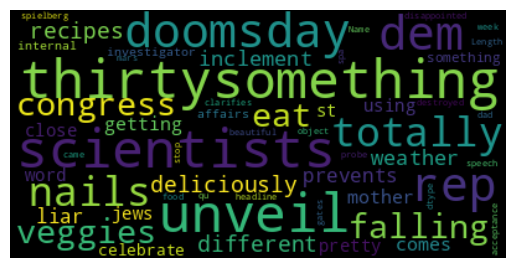

In [ ]:
# WORD CLOUD

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud object
wc = WordCloud(background_color="black", max_words=100)

# Generate the word cloud
wc.generate(str(SD_DATA["headline"]))

# Display the word cloud
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


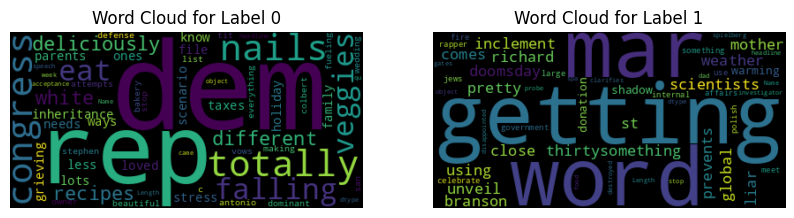

In [ ]:

# Create two separate DataFrames for 0 and 1 values
df_0 = SD_DATA[SD_DATA['is_sarcastic'] == 0]
df_1 = SD_DATA[SD_DATA['is_sarcastic'] == 1]

# Create a word cloud for each DataFrame
wc_0 = WordCloud(background_color="black", max_words=100)
wc_0.generate(str(df_0["headline"]))

wc_1 = WordCloud(background_color="black", max_words=100)
wc_1.generate(str(df_1["headline"]))

# Display the word clouds
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(wc_0, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Label 0")

plt.subplot(1, 2, 2)
plt.imshow(wc_1, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Label 1")

plt.show()


In [ ]:
# One-hot encoding for categorical features
df_encoded = pd.get_dummies(SD_DATA, columns=['is_sarcastic'])

# Print the encoded DataFrame
print(df_encoded.head(10))


                                            headline  is_sarcastic_0  \
0  [thirtysomething, scientists, unveil, doomsday...               0   
1  [dem, rep, totally, nails, congress, falling, ...               1   
2    [eat, veggies, deliciously, different, recipes]               1   
3  [inclement, weather, prevents, liar, getting, ...               0   
4  [mother, comes, pretty, close, using, word, st...               0   
5                               [white, inheritance]               1   
6                  [ways, file, taxes, less, stress]               1   
7  [richard, branson, global, warming, donation, ...               0   
8  [shadow, government, getting, large, meet, mar...               0   
9                    [lots, parents, know, scenario]               1   

   is_sarcastic_1  
0               1  
1               0  
2               0  
3               1  
4               1  
5               0  
6               0  
7               1  
8               1  
9      

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(ngram_range=(2, 2))

In [ ]:
X = vectorizer.fit_transform(headlines)

In [ ]:
vectorizer.get_feature_names_out()

array(['ab exercises', 'abandon everest', 'abandon overly', ...,
       'zuckerberg touts', 'zuckerberg watching', 'zuckerberg wishes'],
      dtype=object)

In [ ]:
Text = SD_DATA['headline'].values
op_labels = SD_DATA['is_sarcastic'].values

In [ ]:
def _preprocess(doc, accent_function, lower):
    """
    Preprocess a document by joining words into a single string and applying
    lowercasing and accent stripping.
    """
    doc = ' '.join(doc)
    if lower:
        doc = doc.lower()
    if accent_function is not None:
        doc = accent_function(doc)
    return doc

In [ ]:
print(type(Text))

<class 'numpy.ndarray'>


In [ ]:
import spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
Text = [" ".join([token.lemma_ for token in nlp(str(text))]) for text in Text]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

multinomial NB


In [ ]:
wordVectorizer = TfidfVectorizer(max_features= 1500)
wordVectorizer.fit(Text)
features = wordVectorizer.transform(Text)

In [ ]:
feature_names = wordVectorizer.get_feature_names_out()

In [ ]:
feature_names

array(['abandon', 'abortion', 'absolutely', ..., 'young', 'youth',
       'zuckerberg'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(features, op_labels, test_size= 0.25)

In [ ]:
mnb = MultinomialNB()

In [ ]:
mnb.fit(xTrain, yTrain)

MultinomialNB()

In [ ]:
mnb.score(xTrain, yTrain)

0.7614610510622437

In [ ]:
predicted = mnb.predict(xTest)

In [ ]:
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      3757
           1       0.73      0.69      0.71      3398

    accuracy                           0.73      7155
   macro avg       0.73      0.73      0.73      7155
weighted avg       0.73      0.73      0.73      7155



In [ ]:
#logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xTrain, yTrain)

LogisticRegression()

In [ ]:
lr.score(xTrain, yTrain)

0.7735277674245248

In [ ]:
predicted = lr.predict(xTest)
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      3757
           1       0.73      0.71      0.72      3398

    accuracy                           0.74      7155
   macro avg       0.74      0.74      0.74      7155
weighted avg       0.74      0.74      0.74      7155



In [ ]:
#Decision tree

In [ ]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [ ]:
dt.score(xTrain, yTrain)

0.9849981364144614

In [ ]:
predicted = dt.predict(xTest)

In [ ]:
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69      3757
           1       0.66      0.66      0.66      3398

    accuracy                           0.67      7155
   macro avg       0.67      0.67      0.67      7155
weighted avg       0.67      0.67      0.67      7155



In [ ]:
#Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(xTrain, yTrain)

RandomForestClassifier()

In [ ]:
rf.score(xTrain, yTrain)

0.9849981364144614

In [ ]:
predicted = rf.predict(xTest)

In [ ]:
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      3757
           1       0.72      0.70      0.71      3398

    accuracy                           0.72      7155
   macro avg       0.72      0.72      0.72      7155
weighted avg       0.72      0.72      0.72      7155



In [1]:
#svm

In [ ]:
from sklearn.svm import LinearSVC

lsvm = LinearSVC()
lsvm.fit(xTrain, yTrain)

LinearSVC()

In [ ]:
lsvm.score(xTrain, yTrain)

0.7776742452478569

In [ ]:
predicted = lsvm.predict(xTest)

In [ ]:
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      3757
           1       0.72      0.72      0.72      3398

    accuracy                           0.74      7155
   macro avg       0.74      0.74      0.74      7155
weighted avg       0.74      0.74      0.74      7155



In [ ]:
#KNeighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(xTrain, yTrain)

KNeighborsClassifier()

In [ ]:
knn.score(xTrain, yTrain)

0.8442508386134924

In [ ]:
predicted = knn.predict(xTest)

In [ ]:
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       0.58      0.76      0.66      3757
           1       0.59      0.39      0.47      3398

    accuracy                           0.58      7155
   macro avg       0.59      0.57      0.56      7155
weighted avg       0.59      0.58      0.57      7155



In [ ]:
#SGDC Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(xTrain, yTrain)

SGDClassifier()

In [ ]:
sgd.score(xTrain, yTrain)

0.7733414088706672

In [ ]:
predicted = sgd.predict(xTest)

In [ ]:
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      3757
           1       0.73      0.71      0.72      3398

    accuracy                           0.74      7155
   macro avg       0.74      0.73      0.74      7155
weighted avg       0.74      0.74      0.74      7155



In [ ]:
#voting classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators = [('lr', lr),
                                       ('dt', dt),
                                       ('knn', knn),
                                       ('sgd', sgd),
                                       ('mnb', mnb),
                                       ('rf', rf),
                                       ('lsvm', lsvm)],
                         voting = 'hard')
voting.fit(xTrain, yTrain)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('sgd', SGDClassifier()), ('mnb', MultinomialNB()),
                             ('rf', RandomForestClassifier()),
                             ('lsvm', LinearSVC())])

In [ ]:
voting.score(xTrain, yTrain)

0.814340290719344

In [ ]:
predicted = voting.predict(xTest)

In [ ]:
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      3757
           1       0.74      0.71      0.72      3398

    accuracy                           0.74      7155
   macro avg       0.74      0.74      0.74      7155
weighted avg       0.74      0.74      0.74      7155



In [ ]:
for clf in (mnb, lsvm, lr, knn, sgd, dt, rf):
    clf.fit(xTrain, yTrain)
    yPred = clf.predict(xTest)
    print(clf.__class__.__name__, accuracy_score(yTest, yPred))

MultinomialNB 0.7334730957372467
LinearSVC 0.735988819007687
LogisticRegression 0.7385045422781272
KNeighborsClassifier 0.5828092243186582
SGDClassifier 0.735988819007687
DecisionTreeClassifier 0.6788259958071279
RandomForestClassifier 0.7228511530398323
